In [22]:
from idlelib.iomenu import encoding

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dask.dataframe.shuffle import sort_values
from holoviews.plotting.bokeh.styles import marker

In [23]:
df = pd.read_csv('Superstore.csv',encoding='windows-1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Null values check

In [25]:
df.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Duplicates check

In [26]:
if df.duplicated().sum()>0:
    print('Duplicates found')
else:
    print('No duplicates found')

No duplicates found


## Types of Customers

In [27]:
types_of_customer = df['Segment'].unique()
print(types_of_customer)

['Consumer' 'Corporate' 'Home Office']


In [28]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment':'Type of Customer'})
print(number_of_customers)

  Type of Customer  count
0         Consumer   5191
1        Corporate   3020
2      Home Office   1783


([<matplotlib.patches.Wedge at 0x16a4743b0>,
 [Text(-0.06704018356682018, 1.0979551966211223, 'Consumer'),
  Text(-0.5268843289816147, -0.9656049419268699, 'Corporate'),
  Text(0.9316986195588344, -0.5847543777622897, 'Home Office')],
 [Text(-0.03656737285462918, 0.5988846527024302, '51.9%'),
  Text(-0.28739145217178985, -0.5266936046873835, '30.2%'),
  Text(0.5081992470320914, -0.31895693332488523, '17.8%')])

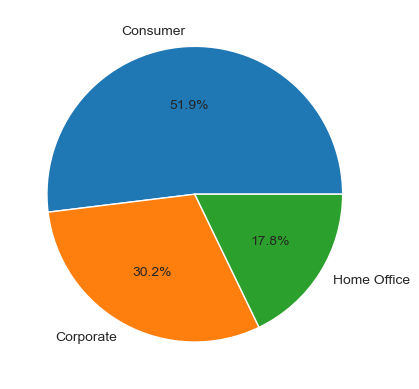

In [29]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Type of Customer'], autopct='%1.1f%%')

## Revenue by Customer Type

  Type of Customer   Total Sales
0         Consumer  1.161401e+06
1        Corporate  7.061464e+05
2      Home Office  4.296531e+05


<BarContainer object of 3 artists>

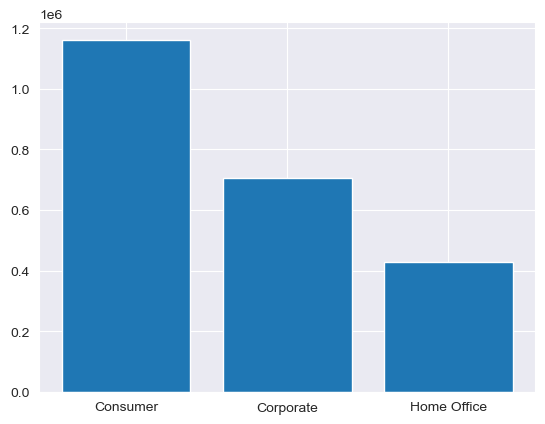

In [30]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Type of Customer', 'Sales': 'Total Sales'})
print(sales_per_segment)
plt.bar(sales_per_segment['Type of Customer'],sales_per_segment['Total Sales'])

## Customer sales insights

([<matplotlib.patches.Wedge at 0x16a6435c0>,
 [Text(-0.019255774590196492, 1.0998314485160587, 'Consumer'),
  Text(-0.5936661576864369, -0.9260456215639825, 'Corporate'),
  Text(0.9155113363994682, -0.609786022243918, 'Home Office')],
 [Text(-0.010503149776470813, 0.599908062826941, '50.6%'),
  Text(-0.3238179041926019, -0.5051157935803541, '30.7%'),
  Text(0.4993698198542553, -0.33261055758759156, '18.7%')])

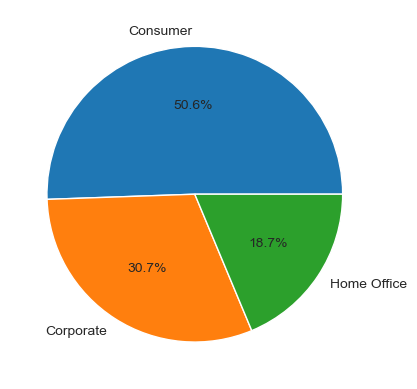

In [31]:
plt.pie(sales_per_segment['Total Sales'], labels=sales_per_segment['Type of Customer'],autopct='%1.1f%%')

## Customer Loyalty by Orders

In [32]:
customers_order_frequency = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
customers_order_frequency.head()
customers_order_frequency.rename({'Order ID':'Total Order Frequency'}, axis='columns', inplace=True)
repeated_customers = customers_order_frequency[customers_order_frequency['Total Order Frequency']>1]
sorted_repeated_customers=repeated_customers.sort_values(by='Total Order Frequency',ascending=False)

In [33]:
print(sorted_repeated_customers.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Order Frequency
0    WB-21850        William Brown     Consumer                     37
1    MA-17560         Matt Abelman  Home Office                     34
2    JL-15835             John Lee     Consumer                     34
3    PP-18955           Paul Prost  Home Office                     34
4    SV-20365          Seth Vernon     Consumer                     32
5    JD-15895     Jonathan Doherty    Corporate                     32
6    CK-12205  Chloris Kastensmidt     Consumer                     32
7    EH-13765         Edward Hooks    Corporate                     32
8    EP-13915           Emily Phan     Consumer                     31
9    ZC-21910     Zuschuss Carroll     Consumer                     31


## Popularity of Shipping Modes

In [34]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model1 = shipping_model.rename(columns={'Ship Mode':'Mode of Shipment'})
print(shipping_model1)

  Mode of Shipment  count
0   Standard Class   5968
1     Second Class   1945
2      First Class   1538
3         Same Day    543


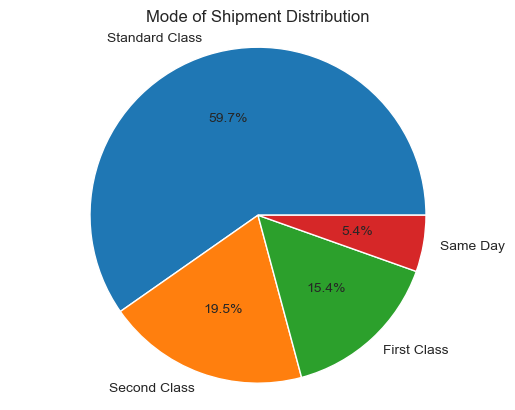

In [35]:
labels = shipping_model1['Mode of Shipment']
sizes = shipping_model1['count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  

plt.title('Mode of Shipment Distribution')
plt.show()

## Geographic Market Analysis

### Top 10 Popular States by Number of Shipments

In [36]:
state = df['State'].value_counts().reset_index()
print(state.head(10))

            State  count
0      California   2001
1        New York   1128
2           Texas    985
3    Pennsylvania    587
4      Washington    506
5        Illinois    492
6            Ohio    469
7         Florida    383
8        Michigan    255
9  North Carolina    249


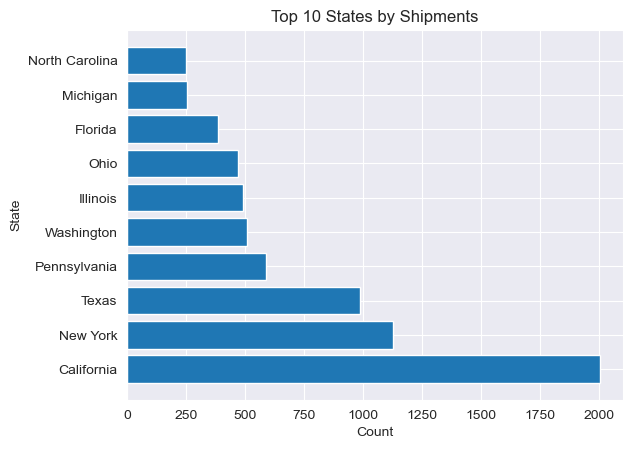

In [45]:
top_10_states = state.sort_values(by='count', ascending=False).head(10)


labels = top_10_states['State']
sizes = top_10_states['count']


plt.barh(labels, sizes)


plt.xlabel('Count')
plt.ylabel('State')
plt.title('Top 10 States by Shipments')

plt.show()

### Top 10 Cities by Sales

In [38]:
city_grouped = df.groupby('City')['Sales'].sum().reset_index()
sorted_city_grouped = city_grouped.sort_values(by='Sales',ascending=False)
top_10_cities = sorted_city_grouped.rename({'Sales':'Total Sales'})
print(top_10_cities.head(10).reset_index(drop=True))

            City        Sales
0  New York City  256368.1610
1    Los Angeles  175851.3410
2        Seattle  119540.7420
3  San Francisco  112669.0920
4   Philadelphia  109077.0130
5        Houston   64504.7604
6        Chicago   48539.5410
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9    Springfield   43054.3420


### Categories of Products Sold

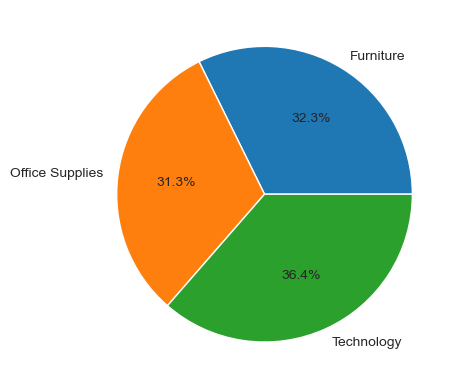

In [39]:
unique_products = df['Category'].unique()
grouped_by_categorySales = df.groupby('Category')['Sales'].sum().reset_index()
plt.pie(grouped_by_categorySales['Sales'], labels = grouped_by_categorySales['Category'], autopct='%1.1f%%')
plt.show()

### Sub-Category Products

In [48]:
unique_sub_category_products = df['Sub-Category'].unique()
print(unique_sub_category_products)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


### Top 10 Categories by Sub-Categories Sales insights

In [40]:
sub_category_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
sub_category_sales = sub_category_sales.sort_values(by='Sales',ascending=False)
print(sub_category_sales.head(10).reset_index(drop=True))

          Category Sub-Category        Sales
0       Technology       Phones  330007.0540
1        Furniture       Chairs  328449.1030
2  Office Supplies      Storage  223843.6080
3        Furniture       Tables  206965.5320
4  Office Supplies      Binders  203412.7330
5       Technology     Machines  189238.6310
6       Technology  Accessories  167380.3180
7       Technology      Copiers  149528.0300
8        Furniture    Bookcases  114879.9963
9  Office Supplies   Appliances  107532.1610


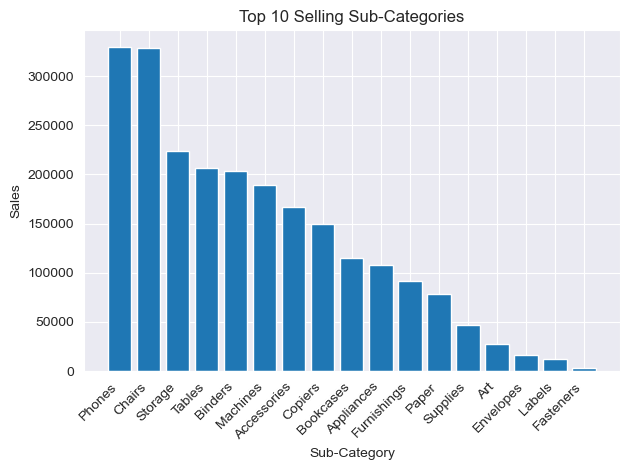

In [49]:
plt.bar(sub_category_sales['Sub-Category'], sub_category_sales['Sales'])
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Top 10 Selling Sub-Categories')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Display the chart
plt.show()

## Yearly Sales

In [52]:
# Extract the year from Ship Date
df["Year"] = df["Ship Date"].dt.year

# Group by year and sum the Sales column
yearly_sales = df.groupby("Year")["Sales"].sum().reset_index()

# Rename columns for clarity
yearly_sales.columns = ["Year", "Total Sales"]

print(yearly_sales)

   Year  Total Sales
0  2014  470383.1931
1  2015  479442.5020
2  2016  611325.7530
3  2017  730889.7154
4  2018    5159.6968


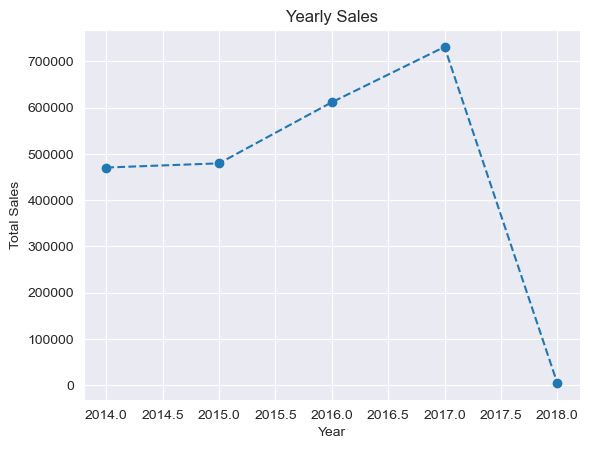

In [60]:
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.plot(yearly_sales['Year'],yearly_sales['Total Sales'], marker='o', linestyle='--')